# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>

1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

In [1]:
def compute_custom_cost(cls,B):
  clusters = list(cls.keys())
  c1,c2=0,0
  for i in clusters:
    a = [actor_nodes[j] for j in cls[i]]
    ll = list()
    for k in a:
      t = list(nx.ego_graph(B,k).edges)
      for ind,val in enumerate(t):
        if 'm' in val[0]:
          ll.append(tuple(reversed(t[ind])))
        else:
          ll.append(t[ind])
    d1 = pd.DataFrame(ll,columns=['actors','movies'])
    edgess = [tuple(x) for x in d1.values.tolist()]
    C = nx.Graph()
    C.add_nodes_from(d1['movies'].unique(), bipartite=0, label='movies')
    C.add_nodes_from(d1['actors'].unique(), bipartite=1, label='actors')
    C.add_edges_from(edgess, label='acted')
    c1 += cost1(C,len(clusters))
    c2 += cost2(C,len(clusters))
  res = c1*c2
  return res

In [2]:
def plot_TSNE(node_embeddings_2d,labels):
  import numpy as np
# draw the points
  node_targets = labels
  label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
  node_colours = [ label_map[target] for target in node_targets]

  plt.figure(figsize=(10,10))
  plt.axes().set(aspect="equal")
  plt.scatter(node_embeddings_2d[:,0], 
              node_embeddings_2d[:,1], 
              c=node_colours, alpha=0.3)

  plt.title('{} visualization of node embeddings'.format(transform.__name__))
  plt.show()
  return 

In [3]:
def plot_scatter(q):
  x = q['x']
  y = q['y']
  Cluster = q['labels']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  scatter = ax.scatter(x,y,c=Cluster,s=50)

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.colorbar(scatter)
  fig.show()
  return 

In [4]:
!pip install networkx==2.3

In [5]:
!pip install stellargraph

In [6]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = '/content/drive/MyDrive/AAIC/Assignments/14.Clustering on Graph Dataset/Practice/movie_actor_network.csv'
data=pd.read_csv(path, index_col=False, names=['movie','actor'])

In [9]:
data.shape

(9650, 2)

In [10]:
edges = [tuple(x) for x in data.values.tolist()]

In [11]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')


In [12]:
A = list(nx.connected_component_subgraphs(B))[0]

In [13]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


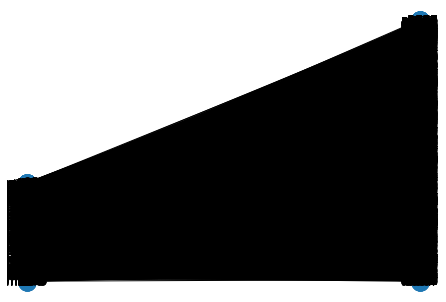

In [14]:
l, r = nx.bipartite.sets(A)
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [15]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [16]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [17]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [18]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [19]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

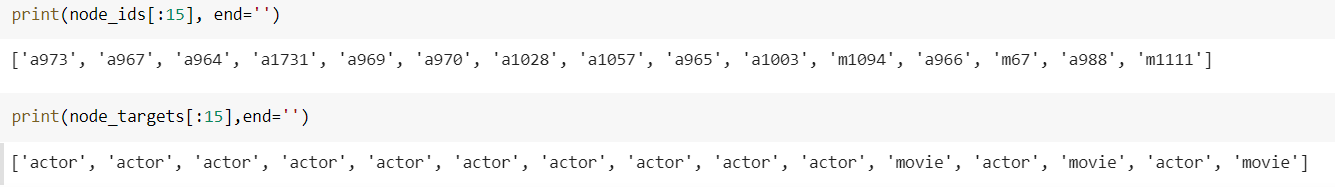

In [20]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    for ind,val in enumerate(node_ids):
      if 'a' in val:
        actor_nodes.append(val)
        actor_embeddings.append(node_embeddings[ind])
      if 'm' in val:
        movie_nodes.append(val)
        movie_embeddings.append(node_embeddings[ind])

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [21]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [22]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [23]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [24]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    g = list(nx.connected_component_subgraphs(graph))
    max_nodes = max([len(i.nodes()) for i in g])
    total_nodes = graph.number_of_nodes()
    cost1 = (1/number_of_clusters)*(max_nodes/total_nodes)
    return cost1

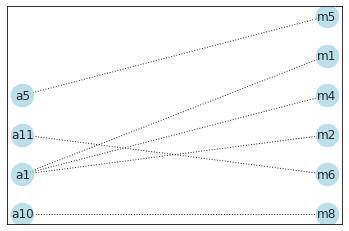

In [25]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [26]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
  assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
  return True
grader_cost1(graded_cost1)


True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [27]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    movie = list()
    d = dict(graded_graph.degree)
    for k,v in d.items():
      if 'm' in k:
        movie.append(k)
    
    p = list(nx.connected_component_subgraphs(graded_graph))
    actor = list()
    for i in p:  
      deg = dict(i.degree)
      [actor.append(value) for key,value in deg.items() if 'a' in key]
    #print(sum(actor),len(movie),sum(actor)/len(movie))
    cost2 = (1/number_of_clusters)*(sum(actor)/len(movie))
    return cost2

<font color='cyan'>Grader function - 4</font>

In [28]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [34]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from tqdm import tqdm_notebook as tqdm
p = [3, 5, 10, 30, 50, 100, 200, 500]
d = dict()
for number_of_clusters in p:
  algo = KMeans(n_clusters=number_of_clusters)
  algo.fit(actor_embeddings)
  #labels = (algo.labels_)
  cls = {i: np.where(algo.labels_ == i)[0] for i in range(algo.n_clusters)}
  d[number_of_clusters] = (compute_custom_cost(cls,B))

print('optimal number of clusters:',max(d, key = d.get))
final_model = KMeans(n_clusters=max(d, key = d.get))
final_model.fit(actor_embeddings)


optimal number of clusters: 3


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<font color='blue'>Displaying similar actor clusters</font>

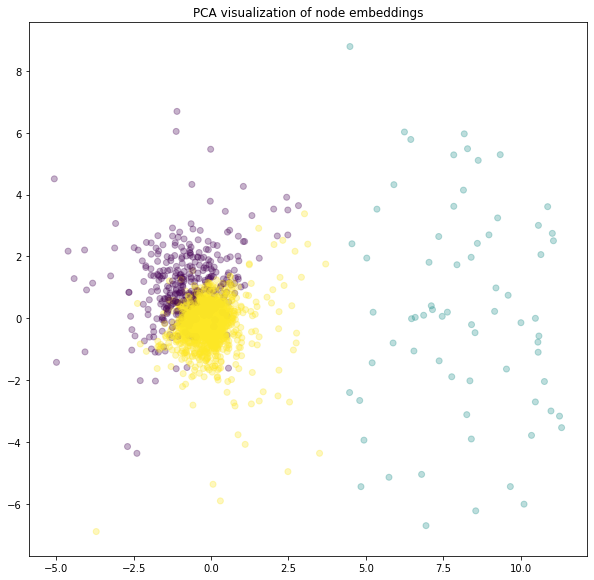

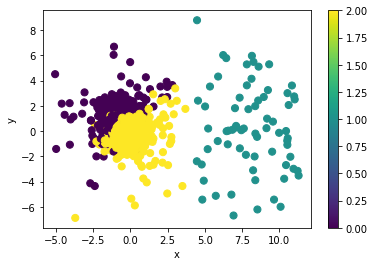

In [35]:
labels = (final_model.labels_)
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
transform = PCA #TSNE #
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)
plot_TSNE(node_embeddings_2d,labels)

q = pd.DataFrame(node_embeddings_2d,columns=['x','y'])
q['labels'] = final_model.labels_
plot_scatter(q)

<font color='blue'>Grouping similar movies</font>

In [36]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from tqdm import tqdm_notebook as tqdm

p = [3, 5, 10, 30, 50, 100, 200, 500]
d = dict()
for number_of_clusters in p:
  algo = KMeans(n_clusters=number_of_clusters)
  algo.fit(movie_embeddings)
  #labels = (algo.labels_)
  cls = {i: np.where(algo.labels_ == i)[0] for i in range(algo.n_clusters)}
  d[number_of_clusters] = (compute_custom_cost(cls,B))

print('optimal number of clusters:',max(d, key = d.get))
final_model = KMeans(n_clusters=max(d, key = d.get), )
final_model.fit(movie_embeddings)
labels = (final_model.labels_)
cls_ = {i: np.where(final_model.labels_ == i)[0] for i in range(final_model.n_clusters)}



optimal number of clusters: 3


<font color='blue'>Displaying similar movie clusters</font>

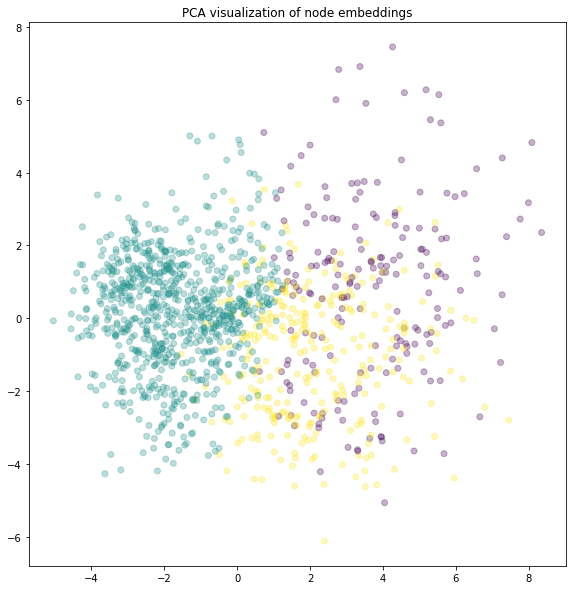

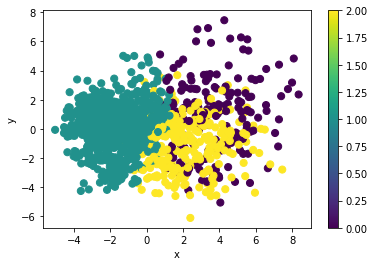

In [37]:
labels = (final_model.labels_)
from sklearn.manifold import TSNE
transform = PCA #TSNE
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)
plot_TSNE(node_embeddings_2d,labels)

q = pd.DataFrame(node_embeddings_2d,columns=['x','y'])
q['labels'] = final_model.labels_
plot_scatter(q)